# Metro Interstate Traffic Volume
The aim of this analysis is to determine a few indicators of heavy [traffic on I-94.](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.
The available data is only from westbound traffic in the proximity of that station located approximately midway between Minneapolis and Saint Paul. Therefore it is not feasible to generalize findings for the entire I-94 highway.

#### Data dictionary:
**holiday** US National holidays plus regional holiday, Minnesota State Fair
<br>**temp** Average temp in kelvin
<br>**rain_1h** Amount in mm of rain that occurred in the hour
<br>**snow_1h** Amount in mm of snow that occurred in the hour
<br>**clouds_all** Percentage of cloud cover
<br>**weather_main** Short textual description of the current weather
<br>**weather_description** Longer textual description of the current weather
<br>**date_time** Hour of the data collected in local CST time
<br>**traffic_volume** Hourly I-94 ATR 301 reported westbound traffic volume


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data.describe()
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


### Investigating the data


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

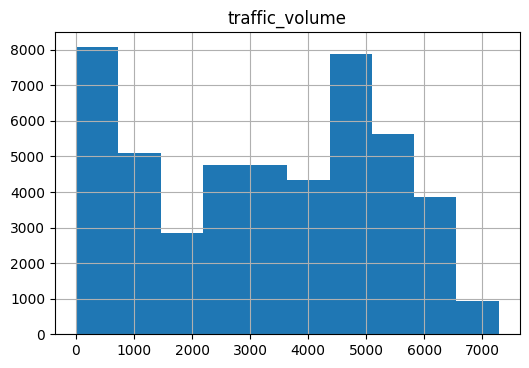

In [2]:
data.hist('traffic_volume')
data['traffic_volume'].describe()

* The maximum hourly traffic volume is 7280 vehicles in the dataset. <br>
* From the histogram we can observe that the most frequent hourly traffic volume is from 0 up to ~800 vehicles per hour with ~8000 entries. <br> 
* The second most frequent hourly vehicle rate is around 4500 to 5000 vehicles per hour. <br> 
* The highest hourly traffic rates have the lowest number of frequencies, ~1000 hours in the dataset.

### Exploring day and night time data

In [3]:
data['date_time']=pd.to_datetime(data['date_time'])

In [4]:
hour=data['date_time'].dt.hour
daytime=data.loc[(data['date_time'].dt.hour>=7) & (data['date_time'].dt.hour<19)]
nightime=data.loc[(data['date_time'].dt.hour>=19)| (data['date_time'].dt.hour<7)]
nightime.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


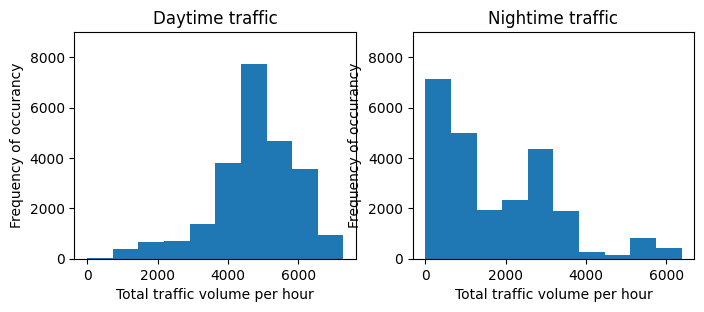

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
plt.figure(figsize=(8,3)) 
plt.subplot(1, 2, 1) 
plt.hist(daytime['traffic_volume'])
plt.ylim([0, 9000])
plt.xlabel("Total traffic volume per hour")
plt.ylabel("Frequency of occurancy")
plt.title('Daytime traffic')
plt.subplot(1, 2, 2)
plt.hist(nightime['traffic_volume'])
plt.title('Nightime traffic')
plt.xlabel("Total traffic volume per hour")
plt.ylabel("Frequency of occurancy")
plt.ylim([0, 9000])
plt.show()
daytime['traffic_volume'].describe()


In [6]:
nightime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

#### Observation on day and night time hours
After diving the dataset on daytime traffic (7:00am-7pm) and nighttime (7pm-7am) both datasets were displayed in an histogram based on 'Traffic volume'. We can see the difference in trafic volume frequence, during daytime the hour with highest frequency was with traffic volume approx 5000 vehicles per hour. Whereas in the nighttime the highest frequence was on hours with approx 500 vehicles. We can conclude the heavy traffic takes place during the daytime hours.

### Exploring day time traffic by month

<ipython-input-7-c37a00d9aa03>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



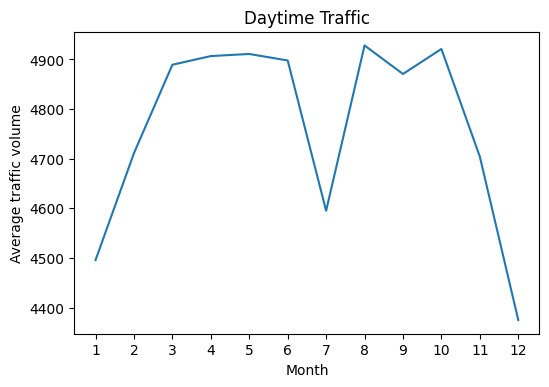

In [7]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['month']=daytime['date_time'].dt.month
volume=by_month['traffic_volume']
plt.plot(volume)
x = np.arange(1, 13, 1)
plt.xticks(x)
plt.title("Daytime Traffic")
plt.xlabel("Month")
plt.ylabel("Average traffic volume")
plt.show()


In the above graph we can see how the traffic volume is lower in January and February, then again in July and December.

### Exploring day time traffic by weekdays

<ipython-input-8-7ab8815025f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



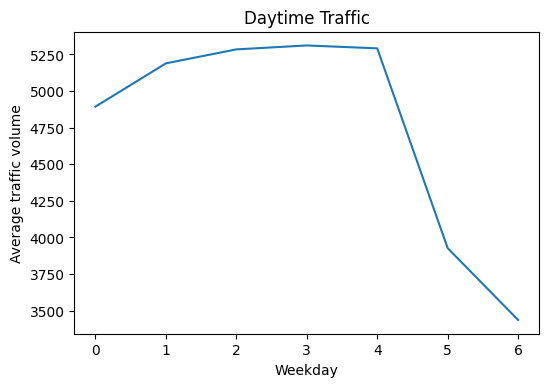

In [8]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
#by_dayofweek['month']=daytime['date_time'].dt.month
volume=by_dayofweek['traffic_volume']
plt.plot(volume)
x = np.arange(0, 7, 1)
plt.xticks(x)
plt.title("Daytime Traffic")
plt.xlabel("Weekday")
plt.ylabel("Average traffic volume")
plt.show()


#### Observation 
The graph above shows how the traffic is higher on business days and drops during the weekend.

<ipython-input-20-728bda9231ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



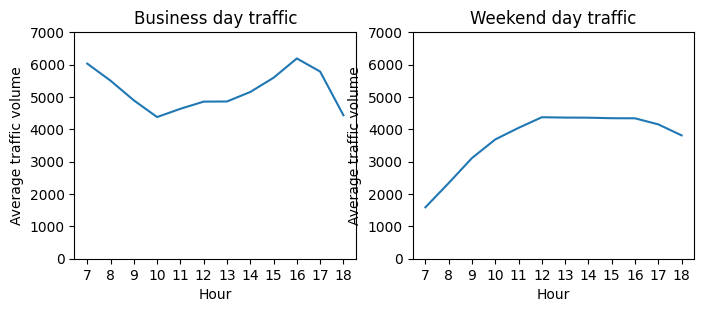

In [20]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
volume_business=by_hour_business['traffic_volume']
volume_weekend=by_hour_weekend['traffic_volume']

#print(by_hour_business['traffic_volume'])
#print(by_hour_weekend['traffic_volume'])
plt.figure(figsize=(8,3)) 
plt.subplot(1, 2, 1)
plt.plot(volume_business)
plt.ylim(0,7000)
x = np.arange(7, 19, 1)
plt.xticks(x)
plt.title('Business day traffic')
plt.xlabel("Hour")
plt.ylabel("Average traffic volume")
plt.subplot(1, 2, 2)
plt.ylim(0,7000)
plt.plot(volume_weekend)
plt.title('Weekend day traffic')
plt.xlabel("Hour")
plt.ylabel("Average traffic volume")

x = np.arange(7, 19, 1)
plt.xticks(x)
plt.show()

#### Observation
During business days the rush hours are 7:00-8:00 in the morning and again 16:00 - 17:00 in the afternoon. Whereas the weekend traffic is more even through out the day.


### Investigating taffic correlation with weather conditions

In [24]:
daytime.corr()[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
month,-0.022337,0.222072,0.001176,0.026768,0.000595
dayofweek,-0.416453,0.000188,-0.009683,-0.008814,-0.041980
hour,0.172704,0.162691,0.008279,0.003923,0.023685


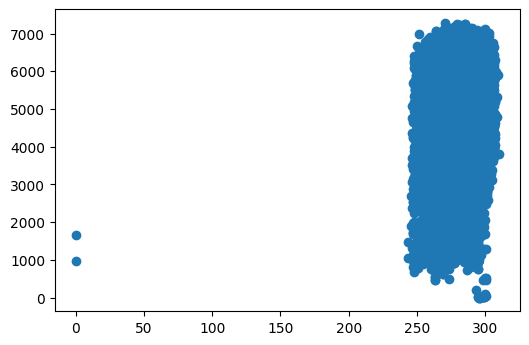

In [23]:
plt.scatter(daytime['temp'],daytime['traffic_volume'])
plt.show()

In [29]:
by_weather_main = daytime.groupby('weather_main').mean()
print(by_weather_main)
by_weather_description = daytime.groupby('weather_description').mean()

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Smoke' 'Snow'
 'Squall' 'Thunderstorm']


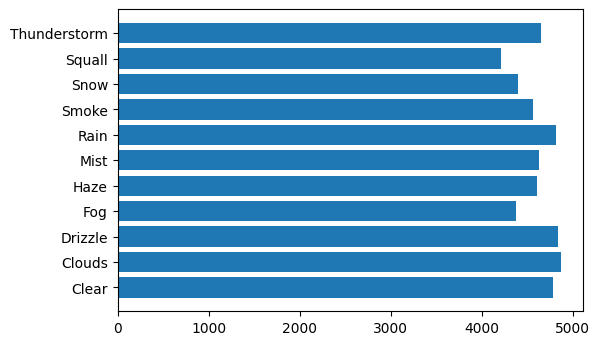

In [55]:
volume=by_weather_main['traffic_volume']
reason=by_weather_main.index.values
plt.barh(reason,volume)
plt.show()

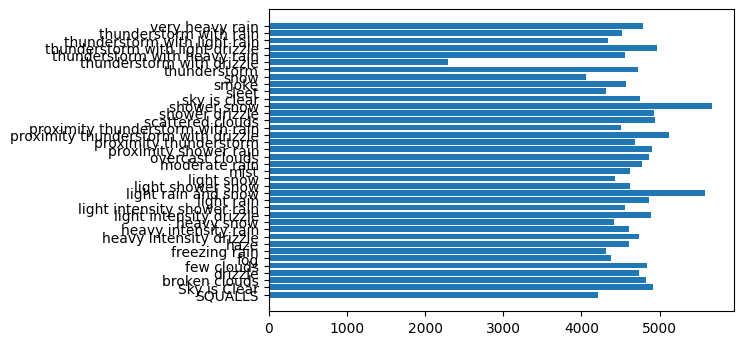

<Figure size 5e+06x5e+07 with 0 Axes>

In [72]:
volume=by_weather_description['traffic_volume']
reason=by_weather_description.index.values

plt.barh(reason,volume)
plt.figure(figsize=(50000,500000))
plt.show()

#### Observation
Based on the weather descriptions we can see snow relates weather contributes to heavy traffic, most likely as it slows the traffic down.


## Conclusions
It can be stated that the traffic is heavier on warmer months of the year and during business days around 7am and 4pm, which is most likely due to commuters. The analysis didn't find strong correlation between daytime traffic and top level weather conditions. Only when looking into more granular level we can see snow conditions have an impact on heavy traffic.